In [61]:
#Packages needed to run program
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np

# graph viz
import plotly
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

#graph section
import networkx as nx
import ast
from sklearn.model_selection import train_test_split

#natural language section
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet



%matplotlib inline

In [ ]:
tips_df= pd.read_csv('C:\\Users\\Violet\\Desktop\\Data620\\tip.csv')
tips_df.head(10)


In [5]:
business_df=pd.read_csv('C:\\Users\\Violet\\Desktop\\Data620\\business.csv')
business_df.head(10)


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automotive;Auto Detailing


In [7]:
review_df=pd.read_csv('C:\\Users\\Violet\\Desktop\\Data620\\review.csv')
review_df.head(10)


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0
5,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2
7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0
8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0
9,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0


In [6]:
user_df=pd.read_csv('C:\\Users\\Violet\\Desktop\\Data620\\user.csv')
user_df.head(10)


,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0
5,Ob-2oGBQ7rwwYwUvhmnf7g,B,9,2012-05-01,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
6,JaTVvKsBl0bHHJEpESn4pQ,Peter,2,2013-03-23,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
7,Ykj0DVsz0c6rX9ghjd0hDg,Colleen,1,2010-10-10,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
8,kmyEPfKnHQJdTceCdoyMQg,A,7,2012-10-16,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
9,H54pA7YHfjl8IjhHAfdXJA,Chad,3,2010-06-25,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0


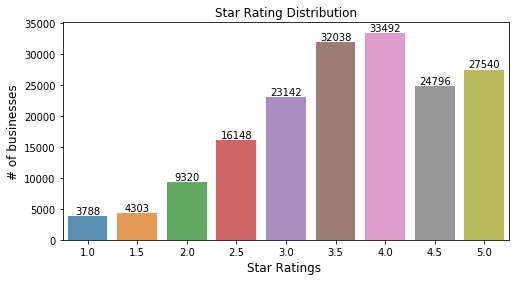

In [7]:
x=business_df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [8]:
business_df['stars'].value_counts()

4.0    33492
3.5    32038
5.0    27540
4.5    24796
3.0    23142
2.5    16148
2.0     9320
1.5     4303
1.0     3788
Name: stars, dtype: int64

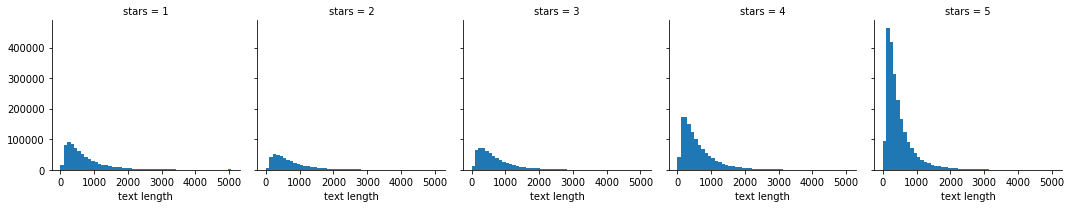

In [9]:
review_df['text length'] = review_df['text'].apply(len)
g = sns.FacetGrid(data=review_df, col='stars')
g.map(plt.hist, 'text length', bins=50)

In [10]:
stars = review_df.groupby('stars').mean()
stars

,useful,funny,cool,text length
stars,,,,
1,2.210875,0.707292,0.279544,764.181383
2,1.625610,0.668248,0.415523,769.211320
3,1.341018,0.614906,0.646093,716.108068
4,1.349785,0.567573,0.824651,631.355725
5,1.101492,0.353408,0.572854,492.783366


In [11]:
stars.corr()

,useful,funny,cool,text length
useful,1.000000,0.797196,-0.767887,0.750374
funny,0.797196,1.000000,-0.442860,0.981430
cool,-0.767887,-0.442860,1.000000,-0.503737
text length,0.750374,0.981430,-0.503737,1.000000


In [12]:
top_cities = business_df.city.value_counts()
top_cities.head(20)

Las Vegas      26775
Phoenix        17213
Toronto        17206
Charlotte       8553
Scottsdale      8228
Pittsburgh      6355
Mesa            5760
Montréal        5709
Henderson       4465
Tempe           4263
Chandler        3994
Edinburgh       3868
Cleveland       3322
Madison         3213
Glendale        3206
Gilbert         3128
Mississauga     2726
Stuttgart       2000
Peoria          1706
Markham         1564
Name: city, dtype: int64

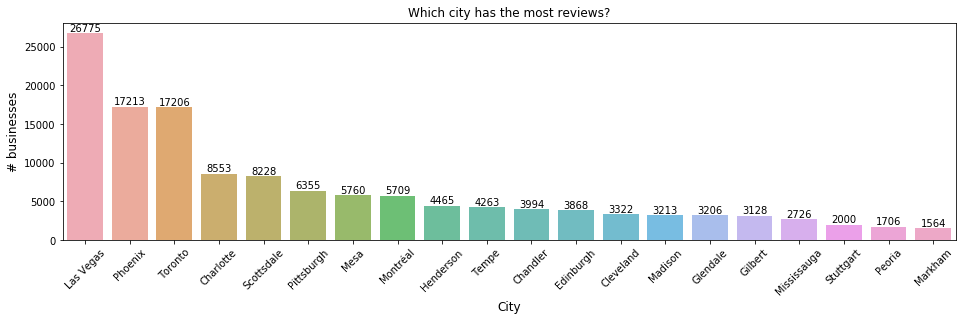

In [13]:
x=business_df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [14]:
business_df[['name', 'review_count', 'city', 'stars']].sort_values(ascending=False, by="review_count")[0:50]

,name,review_count,city,stars
97944,"""Mon Ami Gabi""",7361,Las Vegas,4.0
119907,"""Bacchanal Buffet""",7009,Las Vegas,4.0
69993,"""Wicked Spoon""",5950,Las Vegas,3.5
81212,"""Gordon Ramsay BurGR""",5447,Las Vegas,4.0
139699,"""Earl of Sandwich""",4869,Las Vegas,4.5
19191,"""Hash House A Go Go""",4774,Las Vegas,4.0
80590,"""The Buffet""",4018,Las Vegas,3.5
124412,"""Lotus of Siam""",3964,Las Vegas,4.0
21006,"""Serendipity 3""",3910,Las Vegas,3.0
93038,"""The Buffet at Bellagio""",3838,Las Vegas,3.5


In [20]:
city_business_reviews = business_df[['city', 'review_count', 'stars']].groupby(['city']).\
agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_business_reviews.head(10)

,review_count,stars
city,,
Las Vegas,1604173,3.709916
Phoenix,576709,3.673793
Toronto,430923,3.487272
Scottsdale,308529,3.948529
Charlotte,237115,3.571554
Pittsburgh,179471,3.629819
Henderson,166884,3.789362
Tempe,162772,3.729885
Mesa,130883,3.636024


In [21]:
#review_df['name'] = review_df['business_id'].map(business_df.set_index('business_id')['name'])




In [22]:
restaurant_df = business_df[business_df['categories'].str.contains("Restaurants", na = False)]
restaurant_df.head()


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
10,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",NaN,"""737 West Pike St""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,Breakfast & Brunch;Gluten-Free;Coffee & Tea;Fo...
14,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,Restaurants;American (Traditional)
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants


## Social Network Analysis of Yelp users 
We used the user dataframe, more specifically user_id and friends to define the nodes and the edges of the network

In [3]:
#displaying basic statistics
user_df.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06,1.326100e+06
mean,2.311717e+01,2.934477e+01,1.461139e+01,1.960347e+01,1.457274e+00,3.710841e+00,2.534310e+00,3.819033e-01,2.478478e-01,2.301101e-01,1.009637e-01,1.684783e+00,3.523903e+00,3.508096e+00,3.508096e+00,1.334797e+00,1.187572e+00
std,7.909808e+01,7.058728e+02,4.974612e+02,6.695229e+02,1.428609e+01,1.120721e+00,7.653176e+01,1.489118e+01,1.769975e+01,1.403812e+01,1.205389e+01,6.033666e+01,9.379238e+01,8.955264e+01,8.955264e+01,3.417995e+01,9.954291e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.090000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.500000e+01,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.610000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.195400e+04,2.247100e+05,2.127610e+05,2.224160e+05,7.009000e+03,5.000000e+00,2.429300e+04,1.347800e+04,1.413700e+04,1.363800e+04,1.264700e+04,5.696000e+04,4.183500e+04,2.976500e+04,2.976500e+04,1.540300e+04,8.258000e+04


In [24]:
print(user_df.dtypes)


user_id                object
name                   object
review_count            int64
yelping_since          object
friends                object
useful                  int64
funny                   int64
cool                    int64
fans                    int64
elite                  object
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object


In [172]:
#convert string to timestampe
user_df['joined']= pd.to_datetime(user_df['yelping_since'])
#group by year and count occurrences
yearGrouping =user_df.groupby(user_df['joined'].map(lambda x : x.year))['yelping_since'].count()
user_df['number of Friends'] = pd.to_numeric(user_df['friends'], errors='coerce').fillna(0)
user_df['number of Friends']=user_df['number of Friends'].astype(np.int64)
#convert elite to an integer 
user_df['elite']=pd.to_numeric(user_df['elite'],errors='coerce').fillna(0)
user_df['elite']=user_df['elite'].astype(np.int64)                                                                   
#user_df['target'] = user_df['elite']!='[]'

print(user_df.dtypes)

user_id                       object
name                          object
review_count                   int64
yelping_since                 object
friends                       object
useful                         int64
funny                          int64
cool                           int64
fans                           int64
elite                          int64
average_stars                float64
compliment_hot                 int64
compliment_more                int64
compliment_profile             int64
compliment_cute                int64
compliment_list                int64
compliment_note                int64
compliment_plain               int64
compliment_cool                int64
compliment_funny               int64
compliment_writer              int64
compliment_photos              int64
joined                datetime64[ns]
number of Friends              int64
dtype: object


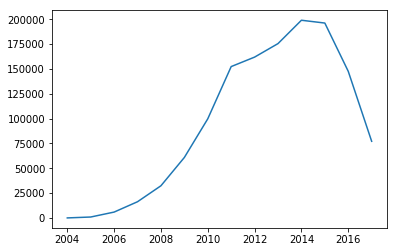

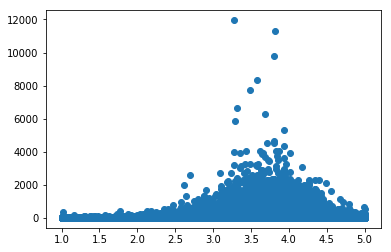

In [173]:
plt.figure()
plt.plot(yearGrouping)
plt.figure()
plt.scatter(user_df['average_stars'],user_df['review_count'])


## Looking at the entire user data

1. From the above figure we can see that users joining inclnation has started from around 2006 and peaked somewhere between 2014 and 2016 and it's currently declining 
2. The second scatter plot depicts the review count and the number of stars. We can see that somewhere between 3.5 and 4 stars people leave more reviews. 

### Creating a subset of users 
Since graphing the entire data would require a lot of memory and it would look super messy

In [29]:
#subset users who have atleast 1 friend
subset_users=user_df[user_df['friends']!='None']
#user has given atleast 10 reviews
subset_users=subset_users[subset_users['review_count']>=10]
#subset_users=subset_users.sort_values('review_count',ascending=False)

subset_users['list_friends']=subset_users["friends"].apply(lambda x: str(x).split(','))

subset_users=subset_users[['user_id','list_friends']]
#stopping at 6k due to space constraints
subset_users=subset_users.iloc[0:6000]
res = subset_users.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()

In [89]:
network_data=res.reset_index()
#checking the dataframe
network_data.head()

,user_id,level_1,0
0,JJ-aSuM4pCFPdkfoZ34q0Q,0,0njfJmB-7n84DlIgUByCNw
1,JJ-aSuM4pCFPdkfoZ34q0Q,1,rFn3Xe3RqHxRSxWOU19Gpg
2,JJ-aSuM4pCFPdkfoZ34q0Q,2,HVUAmApa0fCbHHVJ0ALshw
3,JJ-aSuM4pCFPdkfoZ34q0Q,3,LBOTb6bJjCdFyDLNswUGmA
4,JJ-aSuM4pCFPdkfoZ34q0Q,4,cy3d0moQOsrhWo6VAyA_kA


In [31]:
#changing the column name to suit nx import
network_data.columns=['source','level_1','target']

# Considering each (user_id,friend) pair as an edge of a graph, constructing the graph
graph=nx.from_pandas_edgelist(network_data)


In [32]:
print(nx.info(graph))
#check density
print("The density of the graph is ",nx.density(graph))

Name: 
Type: Graph
Number of nodes: 502215
Number of edges: 680010
Average degree:   2.7080
The density of the graph is  5.392210029748853e-06


### Network Density
"Network density is a measure of the proportion of possible ties which are actualized among the members of a network. Dense social networks, especially coupled with strong boundaries segregating the group from others, can enforce communal norms so that social pressures for conformity can inhibit creativity, which necessarily contains an element of deviance. Small dense networks may develop ‘groupthink’ where conformity of ideas is highly valued and normatively enforced. This inhibits creativity within the group."--Katherine Giuffre, Cultural Productons in Networks

We can see that the density of the graph is not very high but again we are not portraying the entire network due to memory contraints.
"From an academic perspective graph density would be defined as the ratio of the number of edges and the number of possible edges."
For the purposes of our project it would be intereting to see who are the most influetial Yelp users and draw a graph that depicts all the connections. 

In [33]:
#lets take a single town's population and make a graph out of those users
# since we dont have people and location together
# Mapping businesses of a location to reviews and then to users and then finding their friends network

subset=business_df[business_df.city=='Cleveland']
subset=pd.merge(subset,review_df,how='inner',on='business_id')
subset_users=subset.user_id.unique()

subset_users=pd.DataFrame(subset_users,columns=['user_id'])
subset_users=pd.merge(subset_users,user_df,how='inner',on='user_id')

# create friend list
subset_users['list_friends']=subset_users["friends"].apply(lambda x: str(x).split(','))
subset_users['count_friends']=subset_users["list_friends"].apply(lambda x: len(x))

#check
subset_users.shape

(35224, 24)

The dataset subset_users reflects the data from only Cleveland and we will attempt to graph that subset

In [34]:
subset_users_list=subset_users[['user_id','list_friends']]
network_data = subset_users_list.set_index(['user_id'])['list_friends'].apply(pd.Series).stack()
network_data=network_data.reset_index()
#changing the column name to suit nx import
network_data.columns=['source','level_1','target']

In [35]:
# Considering each (user_id,friend) pair as an edge of a graph, constructing the graph
graph=nx.from_pandas_edgelist(network_data)

In [16]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 984702
Number of edges: 1684905
Average degree:   3.4222


### The top/ most influential Yelp users
We wanted to look into the most influential people and used the heapq library. 

In [175]:
#use degree-centrality to find out influencers in the selected region
import heapq  # for getting top n number of things from list,dict
x=nx.degree_centrality(graph)
#Creating a subset again as we cant handle 70k nodes, unfortunately.

#Using heapq to find the 200 most connected nodes (ie) people with the most connections
elite=heapq.nlargest(200, x, key=x.get)

heapq.nlargest--Return a list with the n largest elements from the dataset defined by iterable. key

In [176]:
elite_sub_graph=graph.subgraph(elite)

# Check for isolates ( nodes with no edges (ie) users without friends in the sub-graph)
# graph=graph.remove_nodes_from(nx.isolates(graph))
list_of_nodes_to_be_removed=[x for x in nx.isolates(elite_sub_graph)]

# remove the selected isolates from the main graph
graph.remove_nodes_from(list_of_nodes_to_be_removed)

In [177]:
print(nx.info(elite_sub_graph))
#check density
print("The density of the graph is ",nx.density(elite_sub_graph))


Name: 
Type: SubGraph
Number of nodes: 120
Number of edges: 155
Average degree:   2.5833
The density of the graph is  0.021708683473389355


We ended up with a relitavely low density graph but this reflects only the top 200 users 

In [179]:
# create the layout
pos = nx.spring_layout(elite_sub_graph)

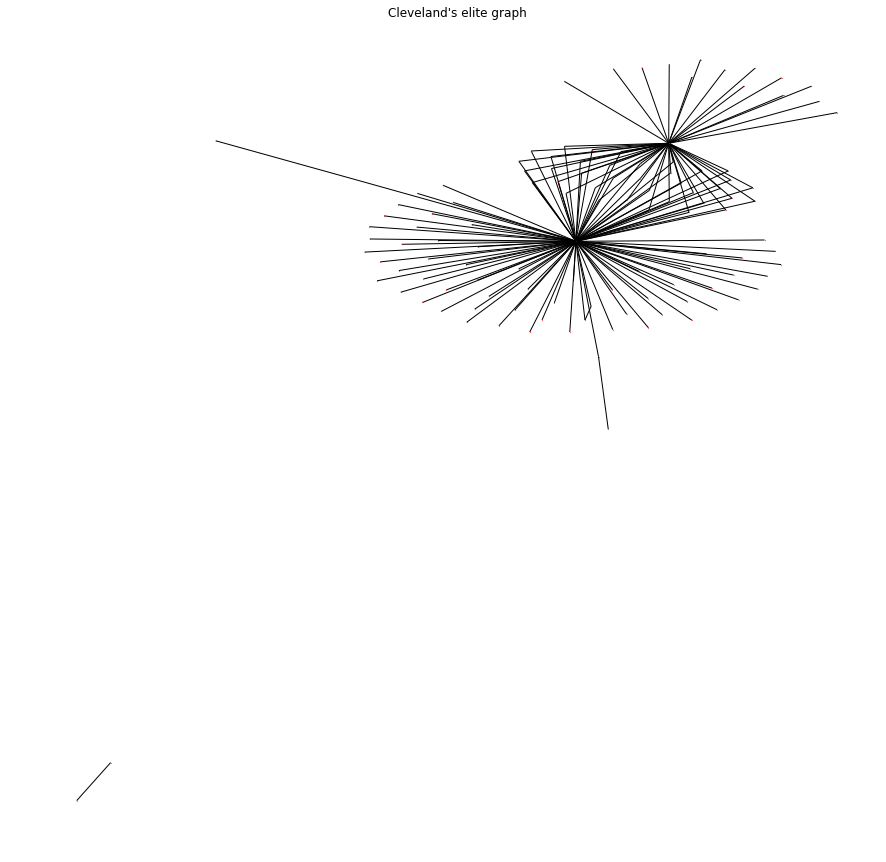

In [180]:
plt.figure(figsize=(15,15))
plt.title("Cleveland's elite graph")
nx.draw(elite_sub_graph, pos=pos, node_size=0.05, width=1)

We can see from the graph that there are 2 users that are the "central" nodes in this network. 
Kamada Kawai algorythm-- "The system tries to find a balance between the “springs”vertices whose edges have small desired distance tend to move in groups away from the more dissimilar vertices.

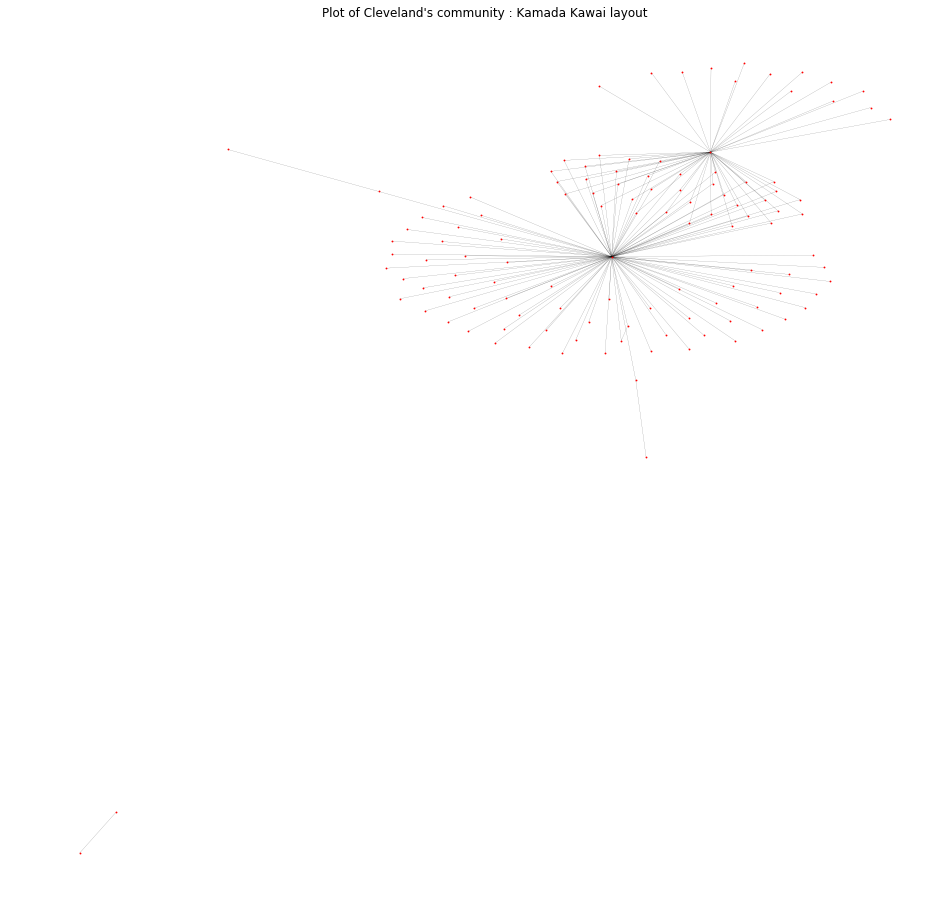

In [181]:
#creating a larger Kamada Kawai layout 
plt.figure(figsize=(16,16))
plt.title("Plot of Cleveland's community : Kamada Kawai layout")
pos2=nx.kamada_kawai_layout(elite_sub_graph)
nx.draw(elite_sub_graph, pos=pos, node_size=0.7, width=0.1)

Detecting communities within the Cleveland's subgraph elite users 

In [164]:
from networkx.algorithms import community

In [165]:
communities_generator = community.girvan_newman(elite_sub_graph)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print(len(top_level_communities))
#sorted(map(sorted, top_level_communities))

3


Three Communities have been identified. 

In [166]:
print(type(top_level_communities))


<class 'tuple'>


In [167]:
#for i in top_level_communities:
    #print(i)

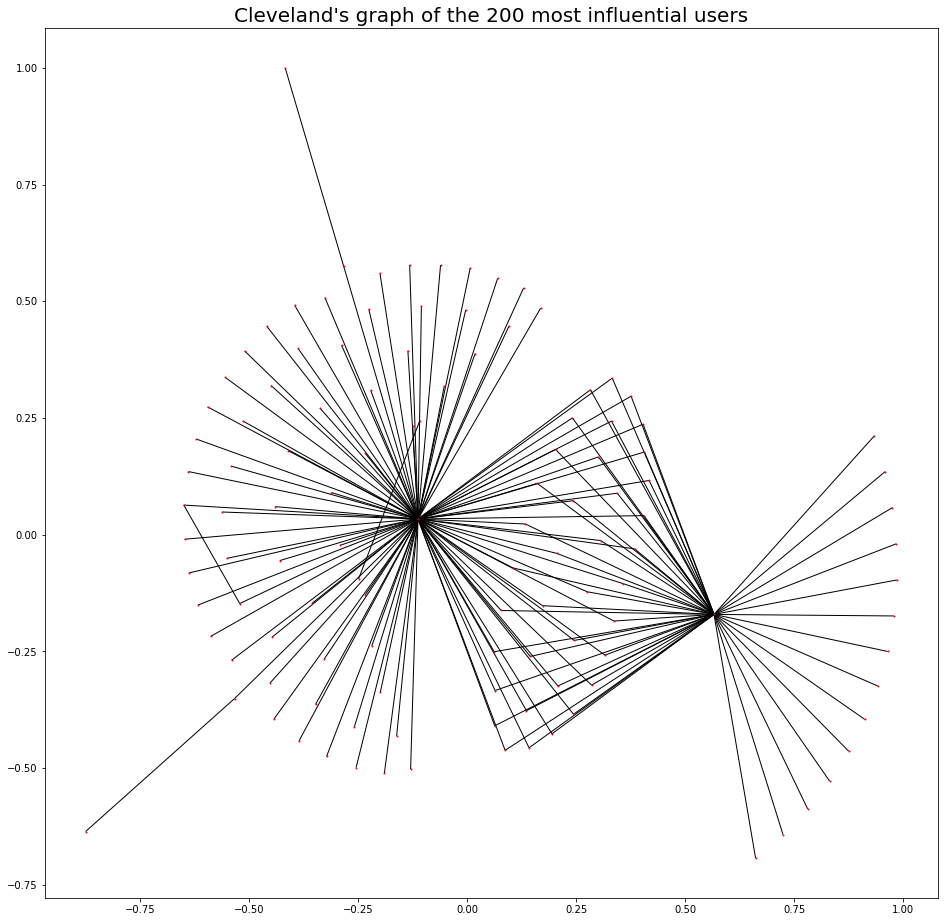

In [182]:
plt.figure(figsize=(16,16))
plt.axes=False
plt.title("Cleveland's graph of the 200 most influential users" , fontsize=20)
nx.draw_networkx(elite_sub_graph, pos = pos2,cmap = plt.get_cmap("jet"), node_size = 0.9, with_labels = False,scale=2)

Checking if the graph is connected 

In [169]:
nx.is_connected(elite_sub_graph)

False

Now we can use the function betweenness_centrality() to compute the centrality of each node. This function returns a list of tuples, one for each node, and each tuple contains the label of the node and the centrality value. We can use this information in order to trim the original network and keep only the most important nodes

In [170]:
G=elite_sub_graph
def most_important(G):
 """ returns a copy of G with
     the most important nodes
     according to the pagerank """ 
 ranking = nx.betweenness_centrality(G).items()
 print(ranking)
 r = [x[1] for x in ranking]
 m = sum(r)/len(r) # mean centrality
 t = m*3 # threshold, we keep only the nodes with 3 times the mean
 Gt = G.copy()
 for k, v in ranking:
  if v < t:
   Gt.remove_node(k)
 return Gt

Gt = most_important(G) # trimming

dict_items([('m6RU5Ov4C1uMQRr3J0Fvfg', 0.0), ('kcLuh-ck_Zj07TsodaaNUA', 0.0), ('jt49xjEjQisu6wTTGn6B3A', 0.004582426394776035), ('3Av38uh8aHDvZMV_1eojQA', 0.0), ('UsXqCXRZwSCSw0AT7y1uBg', 0.0), ('CY9iLsE2z_yLhLqJdD1WGw', 0.0), ('_NpJZ0q8KVI-d2YLL_VpCA', 0.0), ('IrBr1IBag-P9NKOzcFsSKA', 0.0), ('RRtMl0kS2ntfoxcQPJcmZA', 0.0), ('SsH9zQtl01SABH6QGsnu3w', 0.0), ('efBYMqYUmo54Bv66m9Y7AA', 0.0), ('ET8n-r7glWYqZhuR6GcdNw', 0.004582426394776035), ('5MCBLBxr10NLUKZ4AboAMg', 0.004582426394776035), ('DYqujEDnSMgwL7sFTRSv8w', 0.004582426394776035), ('caICV2psm7OABEkikMx2vw', 0.0), ('ysCBsXWPB-LAiewVS3jZfQ', 0.004582426394776035), ('rcU7ysY41qGppbw4pQgjqg', 0.004582426394776035), ('BjtJ3VkMOxV2Lan037AFuw', 0.0), ('pnTiEaqM4slogpY97n9Kvg', 0.004582426394776035), ('f-ysez9SJSosLUON1BihWg', 0.0), ('lf1m4CbheuUR7fFZoLGRvA', 0.0), ('yuW95jpipnokAZ97cESZUg', 0.004582426394776035), ('dIIKEfOgo0KqUfGQvGikPg', 0.004582426394776035), ('qlC607Cyp0Mj91vDFvkp3Q', 0.004582426394776035), ('u3ZPMVVEzneq8x856WksJQ',

And we can use the original network and the trimmed one to visualize the network as follows

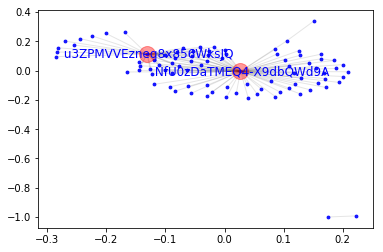

In [183]:
from pylab import show
# create the layout
pos = nx.spring_layout(G)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.9,node_size=8)
nx.draw_networkx_edges(G,pos,alpha=0.1)

# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()

## Conclusion
We can clearly see the 2 most influential users within this network. 
One of the main qualities of an elite user on Yelp is connectivity and we were interested in looking to see to what extend this quality is really preveant in the network. 
Our results show that claim to be true-- the most inflential users are highly connected to the rest of the users. 